<a href="https://colab.research.google.com/github/ali-talebi/norouz1404/blob/main/Simulating_Combination_Thesis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
### Load Data Set location of markers for health and fault group
!unzip /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip

Archive:  /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip
   creating: DATA_PICTURE_3D_Change/
   creating: DATA_PICTURE_3D_Change/picture_alpha/
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_vo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.2 MB/s eta 0:00:00


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential , Model
from keras.layers import Dense , Dropout , Conv2D , BatchNormalization , Flatten , Conv2DTranspose , Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import visualkeras
from sklearn.model_selection import train_test_split

In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_data = "/content/DATA_PICTURE_3D_Change"

store_data_set = {
					'picture_alpha':[] ,
					'picture_health' : [] ,
					'picture_void' : [] ,
					'picture_void_alpha' : []
				}

def function_conver_and_load_image() :
  for path in os.listdir(path_data) :
    print(path)
    cursur = None
    if path == 'picture_alpha' :
      cursur = 'picture_alpha'
    elif path == 'picture_health' :
      cursur = 'picture_health'
    elif path == 'picture_void' :
      cursur = 'picture_void'
    elif path == 'picture_void_alpha' :
      cursur = 'picture_void_alpha'

    for file in os.listdir(f'{path_data}/{path}') :
      combined_root = f'{path_data}/{path}/{file}'
      print(combined_root)
      df = pd.read_csv(combined_root)
      matrix_picture_z = []
      matrix_picture_y = []
      matrix_picture_x = []
      for index in range(len(df)) :
        value_z = df.iloc[index , 2 ]
        matrix_picture_z.append(value_z)
        value_y = df.iloc[index , 1 ]
        matrix_picture_y.append(value_y)
        value_x = df.iloc[index , 0 ]
        matrix_picture_x.append(value_x)

      matrix_picture_z = np.array(matrix_picture_z).reshape(16,3)
      matrix_picture_y = np.array(matrix_picture_y).reshape(16,3)
      matrix_picture_x = np.array(matrix_picture_x).reshape(16,3)

      matrix_picture = {'x':matrix_picture_x , 'y':matrix_picture_y , 'z':matrix_picture_z }
      store_data_set[cursur].append(matrix_picture)


  return store_data_set
store_data_set = function_conver_and_load_image()



picture_void_alpha
/content/DATA_PICTURE_3D_Change/picture_void_alpha/alpha_0.023_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_void_alpha/alpha_0.012_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_void_alpha/alpha_0.032_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void_alpha/alpha_0.073_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_void_alpha/alpha_0.052_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void_alpha/alpha_0.025_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_void_alpha/alpha_0.065_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void_alpha/alpha_0.024_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_void_alpha/alpha_0.018_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_void_alpha/alpha_0.086_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void_alpha/alpha_0.006_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_void_alpha/alpha_0.063_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_void_alpha/alpha_0.007_void_0

In [42]:
total_health_x_y_z , label_health = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      total_health_x_y_z.append(img)
      label_health.append(i)



x_health , y_health , z_health = [] , [] , []

# fig = plt.figure(figsize=(25 , 13 ))
# ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )

for i in total_health_x_y_z:
  # ax0.scatter3D(i['x'] , i['y'] , i['z']  , label='Health Point' , c = 'b'   )
  # ax0.legend()
  # ax0.grid()
  # plt.show()


  x_health.append(i['x'])
  y_health.append(i['y'])
  z_health.append(i['z'])


x_health = np.array(x_health).reshape(-1 , 16 , 3 , 1 )
y_health = np.array(y_health).reshape(-1 , 16 , 3 , 1 )
z_health = np.array(z_health).reshape(-1 , 16 , 3 , 1 )

In [43]:
total_alpha_x_y_z , label_alpha = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_alpha' :
      total_alpha_x_y_z.append(img)
      label_alpha.append(i)


x_alpha , y_alpha , z_alpha = [] , [] , []

# fig = plt.figure(figsize=(25 , 13 ))
# ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )

for i in total_alpha_x_y_z:
  # ax0.scatter3D(i['x'] , i['y'] , i['z']  , label='Health Point' , c = 'b'   )
  # ax0.legend()
  # ax0.grid()
  # plt.show()

  x_alpha.append(i['x'])
  y_alpha.append(i['y'])
  z_alpha.append(i['z'])

x_alpha = np.array(x_alpha).reshape(-1 , 16 , 3 , 1 )
y_alpha = np.array(y_alpha).reshape(-1 , 16 , 3 , 1 )
z_alpha = np.array(z_alpha).reshape(-1 , 16 , 3 , 1 )

In [44]:
total_void_x_y_z , label_void = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_void' :
      total_void_x_y_z.append(img)
      label_void.append(i)


x_void , y_void , z_void = [] , [] , []

# fig = plt.figure(figsize=(25 , 13 ))
# ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )

for i in total_void_x_y_z:
  # ax0.scatter3D(i['x'] , i['y'] , i['z']  , label='Health Point' , c = 'b'   )
  # ax0.legend()
  # ax0.grid()
  # plt.show()

  x_void.append(i['x'])
  y_void.append(i['y'])
  z_void.append(i['z'])

x_void = np.array(x_void).reshape(-1 , 16 , 3 , 1 )
y_void = np.array(y_void).reshape(-1 , 16 , 3 , 1 )
z_void = np.array(z_void).reshape(-1 , 16 , 3 , 1 )

In [45]:
total_void_alpha_x_y_z , label_void_alpha = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_void_alpha' :
      total_void_alpha_x_y_z.append(img)
      label_void_alpha.append(i)


x_void_alpha , y_void_alpha , z_void_alpha = [] , [] , []

# fig = plt.figure(figsize=(25 , 13 ))
# ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )

for i in total_void_alpha_x_y_z:
  # ax0.scatter3D(i['x'] , i['y'] , i['z']  , label='Health Point' , c = 'b'   )
  # ax0.legend()
  # ax0.grid()
  # plt.show()

  x_void_alpha.append(i['x'])
  y_void_alpha.append(i['y'])
  z_void_alpha.append(i['z'])

x_void_alpha = np.array(x_void_alpha).reshape(-1 , 16 , 3 , 1 )
y_void_alpha = np.array(y_void_alpha).reshape(-1 , 16 , 3 , 1 )
z_void_alpha = np.array(z_void_alpha).reshape(-1 , 16 , 3 , 1 )

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# --------------------------------------------------------------------------------------------------
# 1. تنظیمات
# --------------------------------------------------------------------------------------------------
HEIGHT, WIDTH = 16, 3  # داده‌هات: 16 ردیف، 3 ستون
LATENT_DIM = 3
EPOCHS = 100
BATCH_SIZE = 32
LEARNING_RATE = 1e-3


####
z_health_ic = z_health
# فلت کردن داده برای شبکه Fully Connected
X_train_flat = z_health_ic.reshape(z_health_ic.shape[0], -1)  # (N, 48)

# --------------------------------------------------------------------------------------------------
# 3. ساخت مدل VAE با لایه‌های Dense (بدون کانولوشن، بدون خطا)
# --------------------------------------------------------------------------------------------------
# Encoder
encoder_inputs = keras.Input(shape=(HEIGHT * WIDTH,))  # 48
x = layers.Dense(64, activation='relu')(encoder_inputs)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)

z_mean = layers.Dense(LATENT_DIM, name='z_mean')(x)
z_log_var = layers.Dense(LATENT_DIM, name='z_log_var')(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, name='z')([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

# Decoder
latent_inputs = keras.Input(shape=(LATENT_DIM,))
x = layers.Dense(16, activation='relu')(latent_inputs)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(HEIGHT * WIDTH, activation='sigmoid')(x)  # 48
decoder = keras.Model(latent_inputs, x, name='decoder')

# --------------------------------------------------------------------------------------------------
# 4. آموزش دستی با GradientTape (بدون fit، بدون compile، بدون خطا)
# --------------------------------------------------------------------------------------------------
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)

@tf.function
def train_step(x):
    with tf.GradientTape() as tape:
        z_mean, z_log_var, z = encoder(x)
        x_recon = decoder(z)
        recon_loss = tf.reduce_mean(tf.square(x - x_recon))
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        )
        total_loss = recon_loss + kl_loss
    grads = tape.gradient(total_loss, encoder.trainable_variables + decoder.trainable_variables)
    optimizer.apply_gradients(zip(grads, encoder.trainable_variables + decoder.trainable_variables))
    return recon_loss, kl_loss

# آموزش مدل
print("در حال آموزش مدل VAE...")
for epoch in range(EPOCHS):
    epoch_recon = 0.0
    epoch_kl = 0.0
    num_batches = 0

    for i in range(0, len(X_train_flat), BATCH_SIZE):
        batch = X_train_flat[i:i+BATCH_SIZE]
        batch = tf.constant(batch, dtype=tf.float32)

        r_loss, k_loss = train_step(batch)
        epoch_recon += r_loss
        epoch_kl += k_loss
        num_batches += 1

    epoch_recon /= num_batches
    epoch_kl /= num_batches

    if epoch % 10 == 0 or epoch == EPOCHS - 1:
        print(f"Epoch {epoch+1}/{EPOCHS} - Recon Loss: {epoch_recon:.4f} - KL Loss: {epoch_kl:.4f}")

# --------------------------------------------------------------------------------------------------
# 5. ✅ آموزش تمام شد — مدل آماده است
# حالا می‌تونی QERE رو روی داده‌های تست (IC یا OC) حساب کنی
# encoder و decoder آموزش دیده‌اند و می‌تونی ازشون استفاده کنی

در حال آموزش مدل VAE...
Epoch 1/100 - Recon Loss: 3.2610 - KL Loss: 0.0810
Epoch 11/100 - Recon Loss: 2.2522 - KL Loss: 0.0002
Epoch 21/100 - Recon Loss: 2.2487 - KL Loss: 0.0000
Epoch 31/100 - Recon Loss: 2.2481 - KL Loss: 0.0000
Epoch 41/100 - Recon Loss: 2.2478 - KL Loss: 0.0000
Epoch 51/100 - Recon Loss: 2.2477 - KL Loss: 0.0000
Epoch 61/100 - Recon Loss: 2.2476 - KL Loss: 0.0000
Epoch 71/100 - Recon Loss: 2.2476 - KL Loss: 0.0000
Epoch 81/100 - Recon Loss: 2.2475 - KL Loss: 0.0000
Epoch 91/100 - Recon Loss: 2.2474 - KL Loss: 0.0000
Epoch 100/100 - Recon Loss: 2.2473 - KL Loss: 0.0000


In [47]:
def calculate_qere(x_flat):
    x_flat = tf.constant(x_flat, dtype=tf.float32)
    z_mean, z_log_var, z = encoder(x_flat)
    x_recon_flat = decoder(z)
    qere = np.mean(np.square(x_flat.numpy() - x_recon_flat.numpy()), axis=1)
    return qere , z , x_recon_flat

In [48]:
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 48)             │         3,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,840 (22.81 KB)

 Trainable params: 5,840 (22.81 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
z_health_input = z_health.reshape(-1 , 48 )
z_alpha_input = z_alpha.reshape(-1 , 48 )
z_void_input = z_void.reshape(-1 , 48 )
z_void_alpha_input = z_health.reshape(-1 , 48 )

In [69]:
qere_health , z_health_recosnt , health_reconsted = calculate_qere(z_health_input)
qere_alpha  , z_alpha_reconst  , alpha_reconsted  = calculate_qere(z_alpha_input)
qere_void   , z_void_reconst   , void_reconsted   = calculate_qere(z_void_input)
qere_void_alpha , z_void_alpha_reconst , void_alpha_reconsted = calculate_qere(z_void_alpha_input)

In [70]:
alpha_reconsted.shape

TensorShape([396, 48])

In [71]:
health_reconsted= tf.reshape(health_reconsted, (396, 16, 3, 1))
alpha_reconsted= tf.reshape(alpha_reconsted, (396, 16, 3, 1))
void_reconsted= tf.reshape(void_reconsted, (396, 16, 3, 1))
void_alpha_recosnted= tf.reshape(void_alpha_reconsted, (396, 16, 3, 1))

In [72]:
# health_reconsted = health_reconsted.reshape(-1 , 16 , 3 , 1 )
# alpha_reconsted = alpha_reconsted.reshape(-1 , 16 , 3 , 1 )
# void_reconsted = void_reconsted.reshape(-1 , 16 , 3 , 1 )
# void_alpha_recosnted = void_alpha_recosnted.reshape(-1 , 16 , 3 , 1 )

In [73]:
health_reconsted.shape

TensorShape([396, 16, 3, 1])

In [74]:
UCL = np.percentile(qere_health, 95)  # یا 99 برای حساسیت بیشتر

In [75]:
z_health_recosnt.shape

TensorShape([396, 3])

In [76]:
latent_space_health_first  = []
latent_space_health_second = []
latent_space_health_third  = []


for latent in z_health_recosnt:
  first , second , third = latent
  latent_space_health_first.append(first)
  latent_space_health_second.append(second)
  latent_space_health_third.append(third)

In [77]:
latent_space_alpha_first  = []
latent_space_alpha_second = []
latent_space_alpha_third  = []

for latent in z_alpha_reconst:
  first , second , third = latent
  latent_space_alpha_first.append(first)
  latent_space_alpha_second.append(second)
  latent_space_alpha_third.append(third)

In [78]:
latent_space_void_first  = []
latent_space_void_second = []
latent_space_void_third  = []

for latent in z_void_reconst:
  first , second , third = latent
  latent_space_void_first.append(first)
  latent_space_void_second.append(second)
  latent_space_void_third.append(third)

In [79]:
latent_space_void_alpha_first  = []
latent_space_void_alpha_second = []
latent_space_void_alpha_third  = []

for latent in z_void_alpha_reconst:
  first , second , third = latent
  latent_space_void_alpha_first.append(first)
  latent_space_void_alpha_second.append(second)
  latent_space_void_alpha_third.append(third)

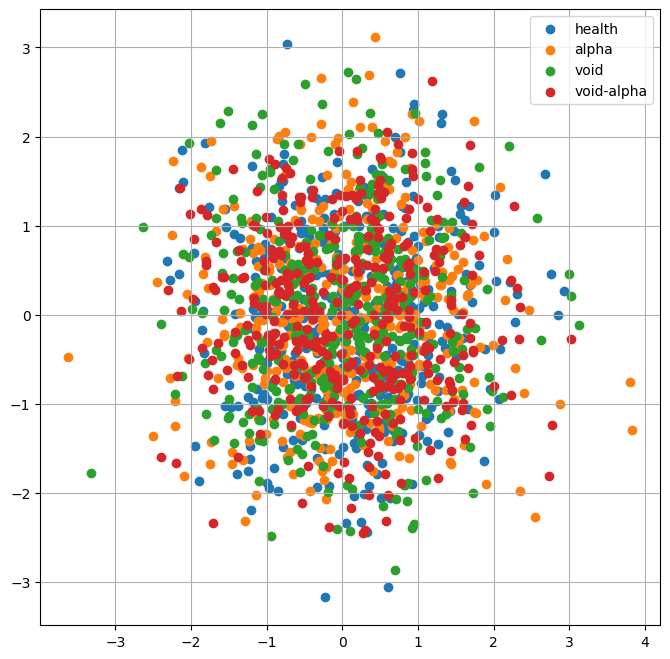

In [80]:
plt.figure(figsize=(8,8))
plt.scatter(latent_space_health_first,latent_space_health_second, label = "health")
plt.scatter(latent_space_alpha_first,latent_space_alpha_second, label = "alpha")
plt.scatter(latent_space_void_first,latent_space_void_second, label = "void")
plt.scatter(latent_space_void_alpha_first,latent_space_void_alpha_second, label = "void-alpha")
plt.legend()
plt.grid()
plt.show()

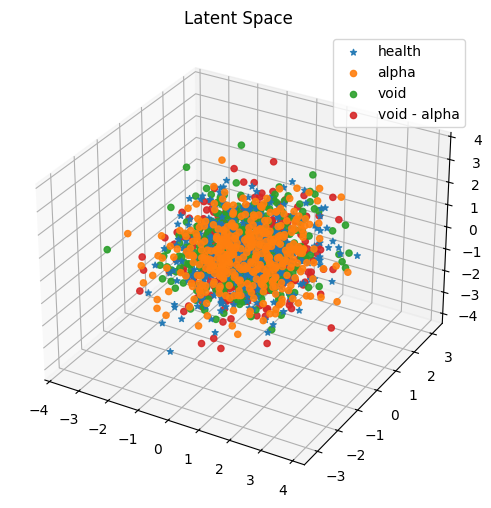

In [81]:
fig = plt.figure(figsize = ( 6 , 6 ))
ax0 = fig.add_subplot(111 , projection='3d')
ax0.scatter3D(latent_space_health_first,latent_space_health_second,latent_space_health_third , label='health' , alpha = 0.9 , marker='*'  )
ax0.scatter3D(latent_space_alpha_first,latent_space_alpha_second,latent_space_alpha_third , label='alpha', alpha = 0.9 )
ax0.scatter3D(latent_space_void_first,latent_space_void_second,latent_space_void_third , label='void', alpha = 0.9  )
ax0.scatter3D(latent_space_void_alpha_first,latent_space_void_alpha_second,latent_space_void_alpha_third , label='void - alpha', alpha = 0.9 , )
ax0.set_title("Latent Space ")
plt.legend()
plt.grid()
plt.show()


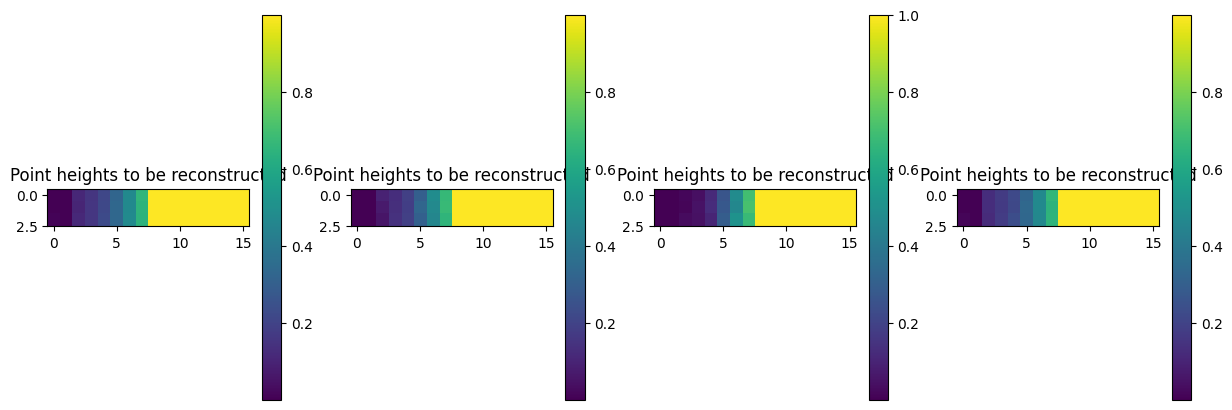

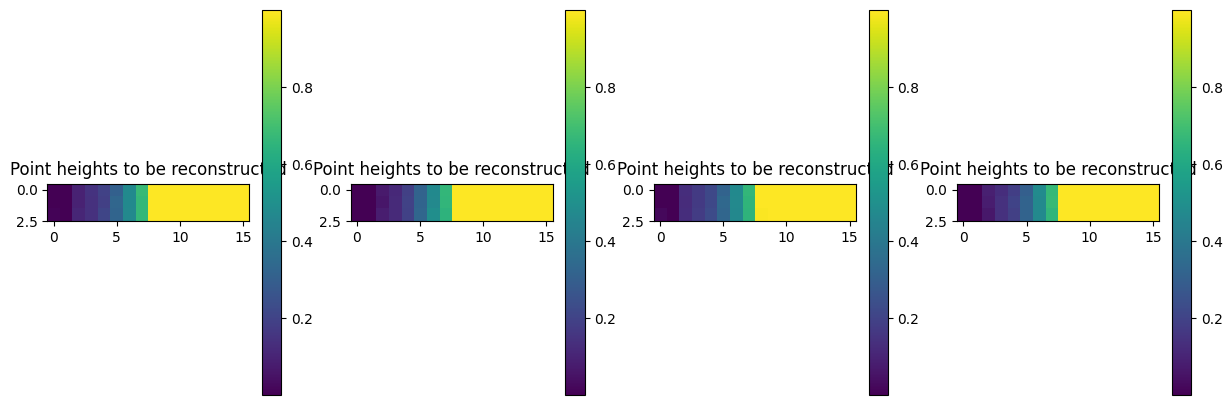

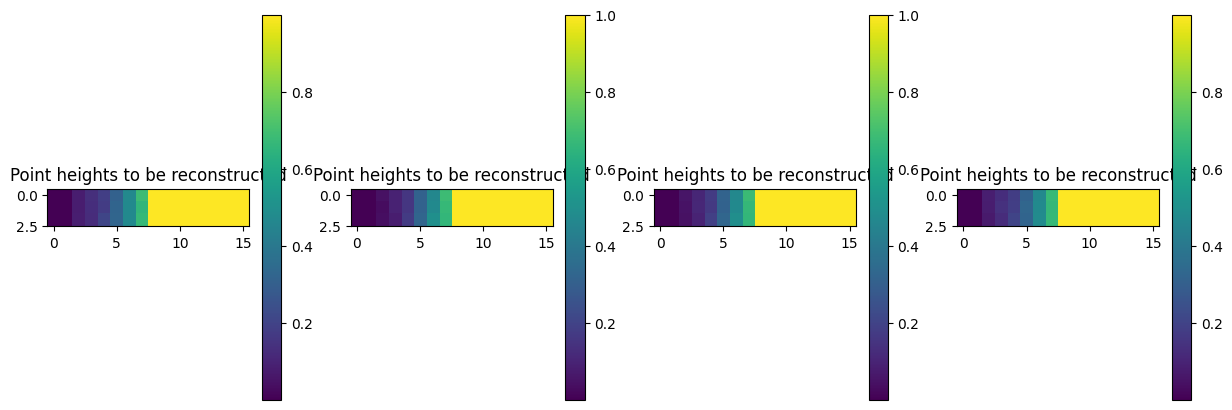

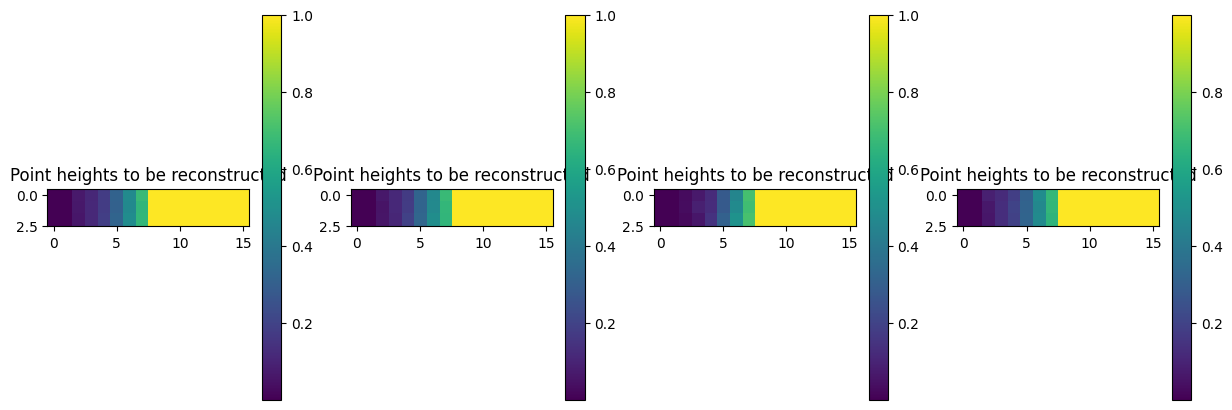

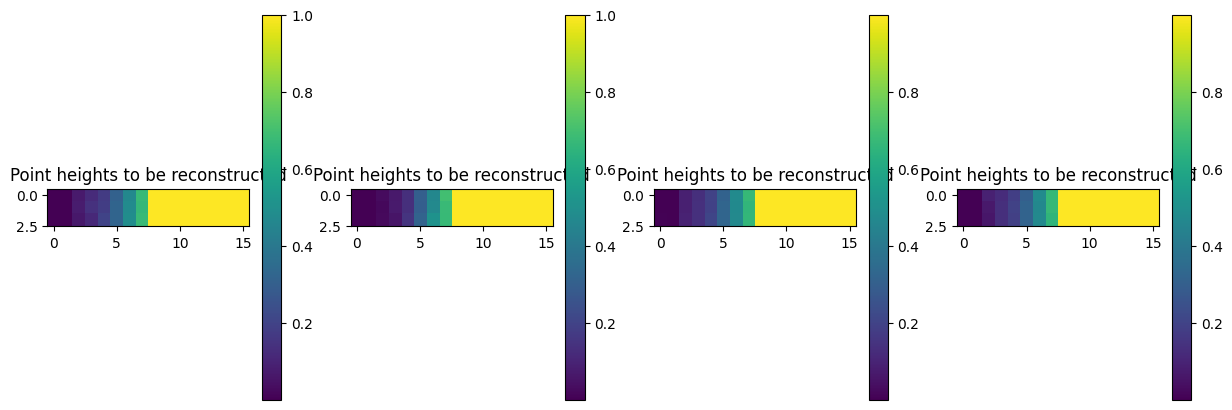

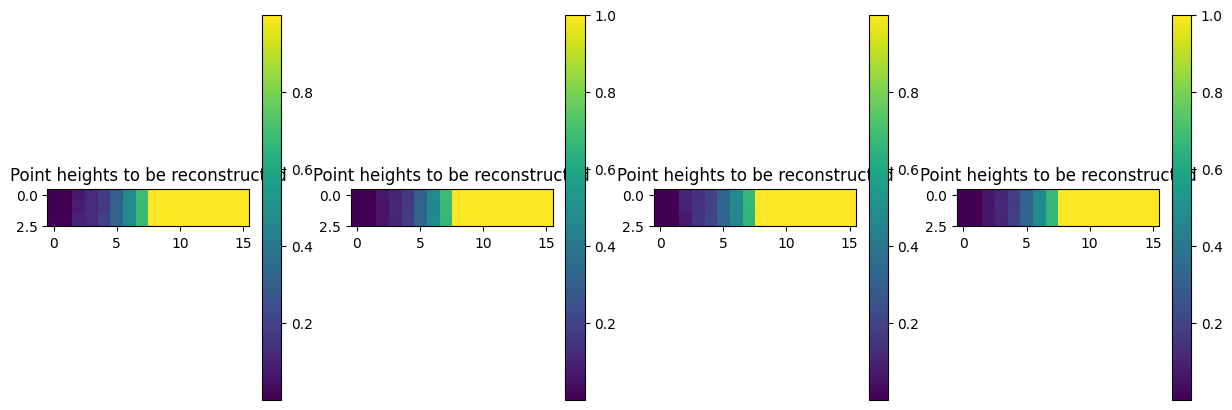

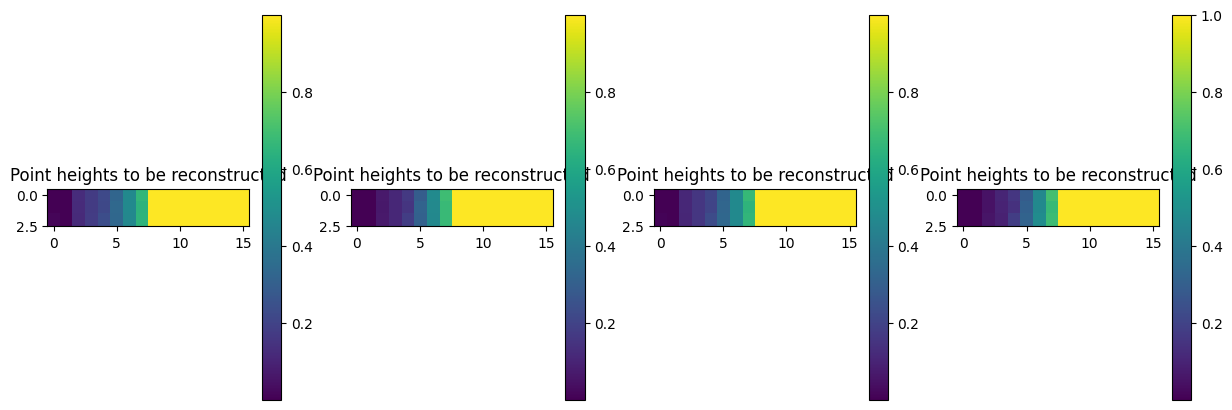

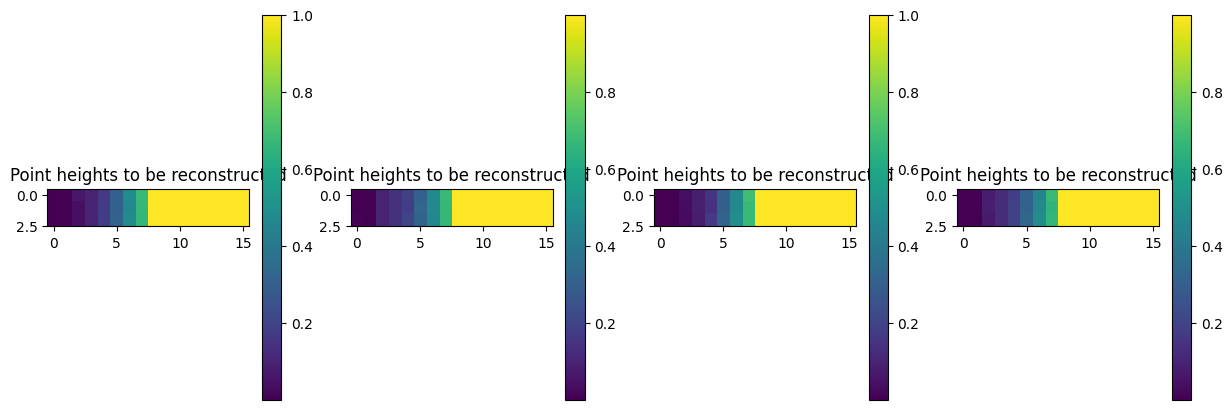

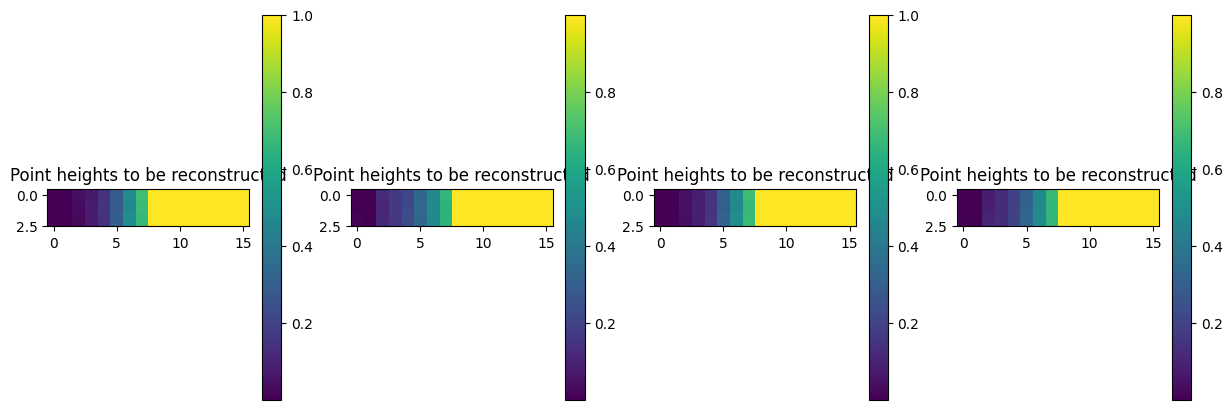

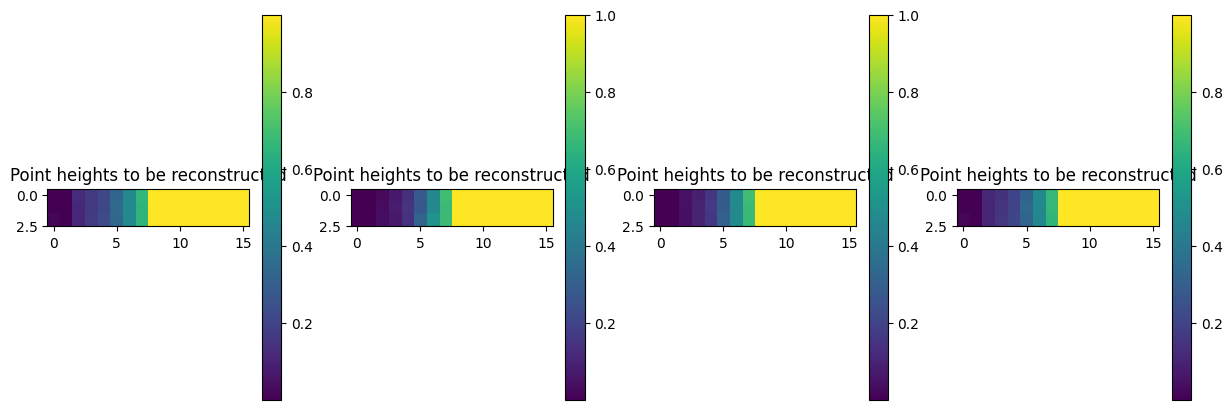

In [84]:
for i in range(10) :
  fig = plt.figure(figsize = (15 , 5 ) )
  ax1 = fig.add_subplot(1 , 4 , 1 )
  ax2 = fig.add_subplot(1 , 4 , 2 )
  ax3 = fig.add_subplot(1 , 4 , 3 )
  ax4 = fig.add_subplot(1 , 4 , 4 )
  rotated_data = np.rot90(health_reconsted[i])
  img = ax1.imshow(rotated_data ,  cmap='viridis')
  cbar = plt.colorbar(img,)
  ax1.set_title('Point heights to be reconstructed')


  rotated_data = np.rot90(alpha_reconsted[i])
  img = ax2.imshow(rotated_data ,  cmap='viridis')
  cbar = plt.colorbar(img,)
  ax2.set_title('Point heights to be reconstructed')

  rotated_data = np.rot90(void_reconsted[i])
  img = ax3.imshow(rotated_data ,  cmap='viridis')
  cbar = plt.colorbar(img,)
  ax3.set_title('Point heights to be reconstructed')

  rotated_data = np.rot90(void_alpha_recosnted[i])
  img = ax4.imshow(rotated_data ,  cmap='viridis')
  cbar = plt.colorbar(img,)
  ax4.set_title('Point heights to be reconstructed')

In [ ]:
latent_space_health_first  = []
latent_space_health_second = []
latent_space_health_third  = []

In [ ]:
import seaborn as sns
sns.jointplot( data=tips, kind="scatter")


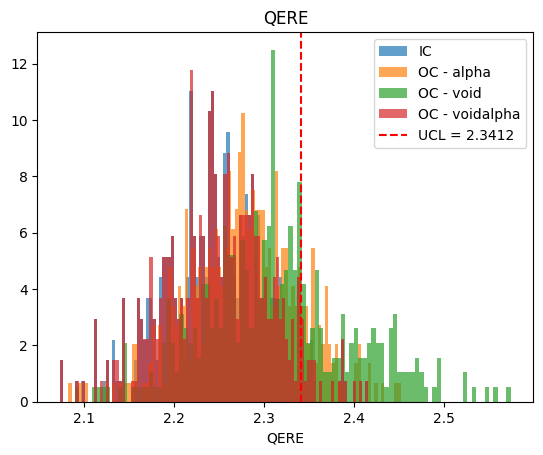

In [ ]:
plt.hist(qere_health, bins=100, alpha=0.7, label='IC', density=True)
plt.hist(qere_alpha, bins=100, alpha=0.7, label='OC - alpha ', density=True)
plt.hist(qere_void, bins=100, alpha=0.7, label='OC - void', density=True)
plt.hist(qere_void_alpha, bins=100, alpha=0.7, label='OC - voidalpha', density=True)
plt.axvline(UCL, color='red', linestyle='--', label=f'UCL = {UCL:.4f}')
plt.title('QERE')
plt.xlabel('QERE')
plt.legend()
plt.show()

In [12]:
import tensorflow as tf
import numpy as np

# فرض: داده‌ها شکل (N, 16, 3, 1) دارن
# z_health = z_health.reshape(-1, 16, 3, 1)

# ------------------------------
# تعریف Encoder و Decoder ساده
# ------------------------------
latent_dim = 2  # انتخاب بعد نهفته

encoder_inputs = tf.keras.Input(shape=(16, 3, 1))
x = tf.keras.layers.Flatten()(encoder_inputs)
h = tf.keras.layers.Dense(32, activation="relu")(x)
z_mean = tf.keras.layers.Dense(latent_dim)(h)
z_logvar = tf.keras.layers.Dense(latent_dim)(h)

encoder = tf.keras.Model(encoder_inputs, [z_mean, z_logvar], name="encoder")

latent_inputs = tf.keras.Input(shape=(latent_dim,))
d = tf.keras.layers.Dense(32, activation="relu")(latent_inputs)
d = tf.keras.layers.Dense(16*3, activation="sigmoid")(d)
decoder_outputs = tf.keras.layers.Reshape((16, 3, 1))(d)

decoder = tf.keras.Model(latent_inputs, decoder_outputs, name="decoder")

# ------------------------------
# توابع محاسبه آماره‌ها
# ------------------------------

def ERE1(x):
    """Expected Reconstruction Error - First Order"""
    mu, logvar = encoder(x)
    x_hat = decoder(mu)
    return tf.reduce_sum(tf.square(x - x_hat), axis=[1,2,3])  # per-sample error

def ERE2(x):
    """Expected Reconstruction Error - Second Order (تقریب)"""
    mu, logvar = encoder(x)
    sigma = tf.exp(0.5 * logvar)

    with tf.GradientTape() as tape2:
        tape2.watch(mu)
        x_hat = decoder(mu)
        loss = tf.reduce_sum(tf.square(x - x_hat), axis=[1,2,3])
    # هسین تقریبی: فقط diag
    grads = tape2.gradient(loss, mu)  # grad wrt z
    hessian_diag = tf.square(grads)   # تقریب ساده diag Hessian

    correction = 0.5 * tf.reduce_sum(hessian_diag * sigma, axis=1)
    return loss + correction


In [13]:
# تعریف optimizer و loss (ELBO ساده شده)
optimizer = tf.keras.optimizers.Adam(1e-3)

@tf.function
def train_step(x):
    with tf.GradientTape() as tape:
        mu, logvar = encoder(x)
        z = mu + tf.exp(0.5*logvar) * tf.random.normal(shape=tf.shape(mu))
        x_hat = decoder(z)

        # بازسازی خطا
        recon_loss = tf.reduce_mean(tf.reduce_sum(tf.square(x - x_hat), axis=[1,2,3]))
        # KL divergence
        kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + logvar - tf.square(mu) - tf.exp(logvar), axis=1))
        loss = recon_loss + kl_loss

    grads = tape.gradient(loss, encoder.trainable_variables + decoder.trainable_variables)
    optimizer.apply_gradients(zip(grads, encoder.trainable_variables + decoder.trainable_variables))
    return loss

# آموزش
for epoch in range(50):
    loss = train_step(z_health)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}")


TypeError: in user code:

    File "/tmp/ipython-input-2644333789.py", line 12, in train_step  *
        recon_loss = tf.reduce_mean(tf.reduce_sum(tf.square(x - x_hat), axis=[1,2,3]))

    TypeError: Input 'y' of 'Sub' Op has type float32 that does not match type float64 of argument 'x'.


In [ ]:
z_health.shape

In [26]:
import numpy as np
import tensorflow as tf

# ============================================================
# 1. آماده‌سازی داده‌ها
# ============================================================

# فرض: داده‌هات به شکل (N, 48) هستن
# اینجا من داده ساختگی درست می‌کنم
N = 100   # تعداد نمونه سالم
raw_data = np.random.rand(N, 48)

# reshape به (N, 16, 3, 1) و cast به float32
z_health = raw_data.reshape(-1, 16, 3, 1).astype("float32")
print(z_health.shape)

# ============================================================
# 2. تعریف Encoder و Decoder (VAE)
# ============================================================

latent_dim = 2  # بعد فضای نهفته

# Encoder
encoder_inputs = tf.keras.Input(shape=(16, 3, 1))
x = tf.keras.layers.Flatten()(encoder_inputs)
h = tf.keras.layers.Dense(32, activation="relu")(x)
z_mean = tf.keras.layers.Dense(latent_dim)(h)
z_logvar = tf.keras.layers.Dense(latent_dim)(h)
encoder = tf.keras.Model(encoder_inputs, [z_mean, z_logvar], name="encoder")

# Decoder
latent_inputs = tf.keras.Input(shape=(latent_dim,))
d = tf.keras.layers.Dense(32, activation="relu")(latent_inputs)
d = tf.keras.layers.Dense(16*3, activation="sigmoid")(d)
decoder_outputs = tf.keras.layers.Reshape((16, 3, 1))(d)
decoder = tf.keras.Model(latent_inputs, decoder_outputs, name="decoder")

# ============================================================
# 3. تعریف Train Step (ELBO loss)
# ============================================================

optimizer = tf.keras.optimizers.Adam(1e-3)

@tf.function
def train_step(x):
    with tf.GradientTape() as tape:
        mu, logvar = encoder(x, training=True)
        eps = tf.random.normal(shape=tf.shape(mu))
        z = mu + tf.exp(0.5 * logvar) * eps
        x_hat = decoder(z, training=True)

        # Reconstruction loss
        recon_loss = tf.reduce_mean(
            tf.reduce_sum(tf.square(x - x_hat), axis=[1,2,3])
        )
        # KL loss
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + logvar - tf.square(mu) - tf.exp(logvar), axis=1)
        )
        loss = recon_loss + kl_loss

    grads = tape.gradient(loss, encoder.trainable_variables + decoder.trainable_variables)
    optimizer.apply_gradients(zip(grads, encoder.trainable_variables + decoder.trainable_variables))
    return loss

# ============================================================
# 4. آموزش روی داده‌های سالم
# ============================================================

dataset = tf.data.Dataset.from_tensor_slices(z_health).shuffle(100).batch(16)

for epoch in range(30):
    for batch in dataset:
        loss = train_step(batch)
    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}")

# ============================================================
# 5. تعریف توابع ERE1 و ERE2
# ============================================================

def ERE1(x):
    mu, logvar = encoder(x, training=False)
    x_hat = decoder(mu, training=False)
    return tf.reduce_sum(tf.square(x - x_hat), axis=[1,2,3]) , x_hat

def ERE2(x):
    mu, logvar = encoder(x, training=False)
    sigma = tf.exp(0.5 * logvar)
    with tf.GradientTape() as tape2:
        tape2.watch(mu)
        x_hat = decoder(mu, training=False)
        loss = tf.reduce_sum(tf.square(x - x_hat), axis=[1,2,3])
    grads = tape2.gradient(loss, mu)      # ∂loss/∂z
    hessian_diag = tf.square(grads)       # تقریب diag Hessian
    correction = 0.5 * tf.reduce_sum(hessian_diag * sigma, axis=1)
    return loss + correction

# ============================================================
# 6. محاسبه آماره‌ها روی داده سالم
# ============================================================

ere1_vals_health  , result_xhat_health = ERE1(z_health)
ere2_vals_health  = ERE2(z_health)

print("ERE1 نمونه اول:", ere1_vals[0])
print("ERE2 نمونه اول:", ere2_vals[0])


(100, 16, 3, 1)
Epoch 0, Loss: 4.2009
Epoch 5, Loss: 3.5386
Epoch 10, Loss: 4.4484
Epoch 15, Loss: 4.0788
Epoch 20, Loss: 3.8854
Epoch 25, Loss: 4.2247
ERE1 نمونه اول: 4.536677
ERE2 نمونه اول: 4.5367427


NameError: name 'ere1_vals_alpha' is not defined

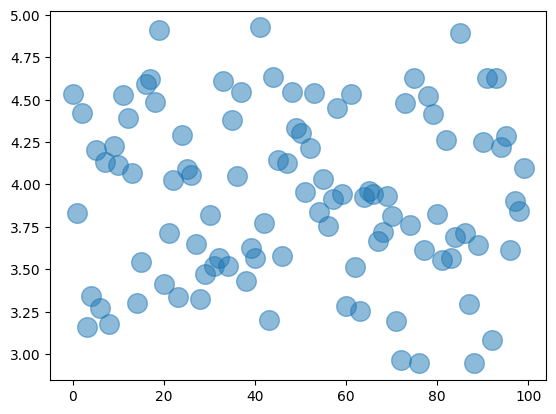

In [16]:
plt.scatter(range(len(ere1_vals)), ere1_vals , label = 'ere1' , s = 200 , alpha = 0.5  )
plt.scatter(range(len(ere1_vals_alpha)), ere1_vals_alpha , label = 'ere1 - alpha ' , alpha = 0.5 )
plt.scatter(range(len(ere1_vals_void)), ere1_vals_void , label = 'ere1 - void ' , alpha = 0.5 )
plt.scatter(range(len(ere1_vals_void_alpha)), ere1_vals_void_alpha , label = 'ere1 - void-alpha' , alpha = 0.5 )
plt.legend()
plt.show()

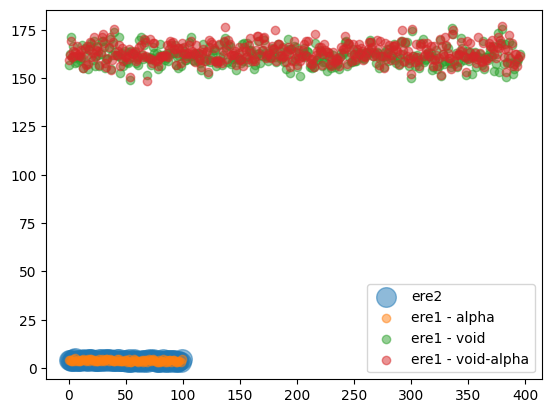

In [27]:
ere1_vals_alpha , result_xhat_alpha = ERE1(z_health)
ere2_vals_alpha = ERE2(z_health).numpy()

In [32]:
result_xhat_alpha.shape

TensorShape([100, 16, 3, 1])

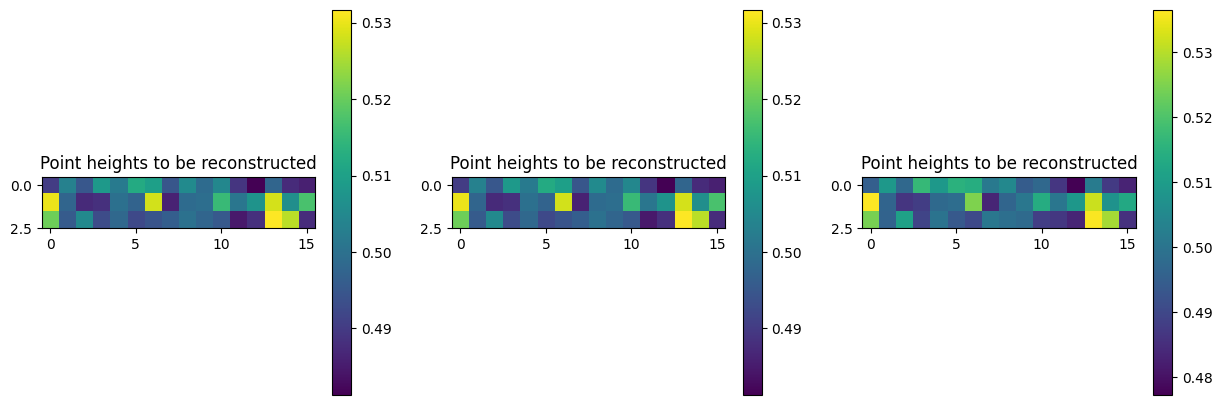

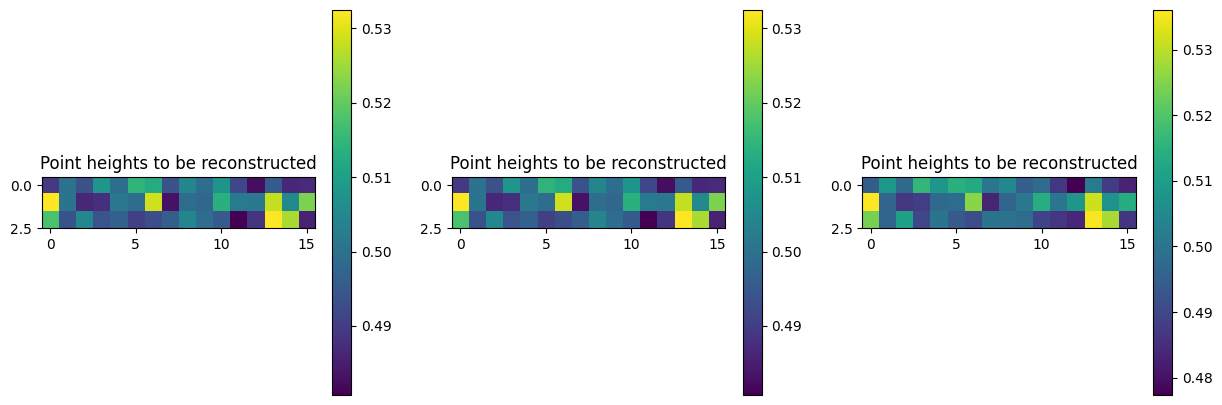

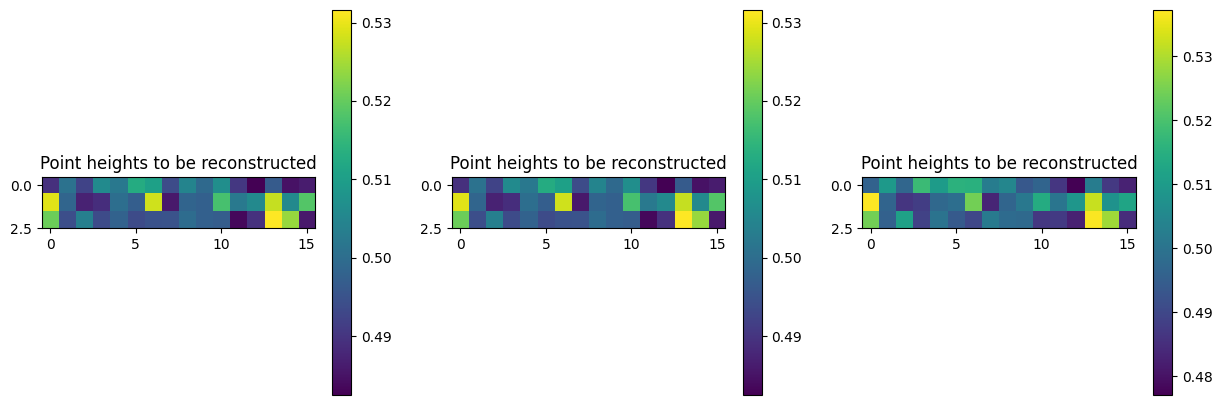

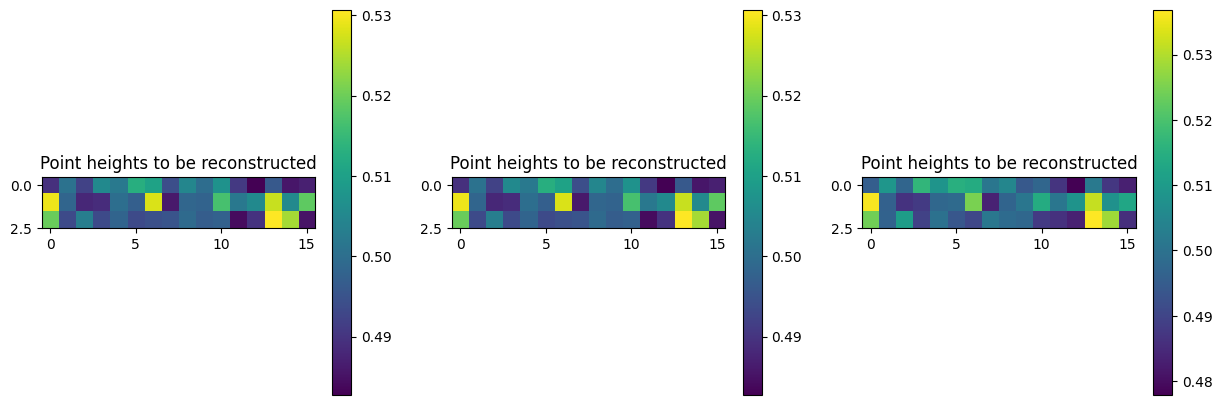

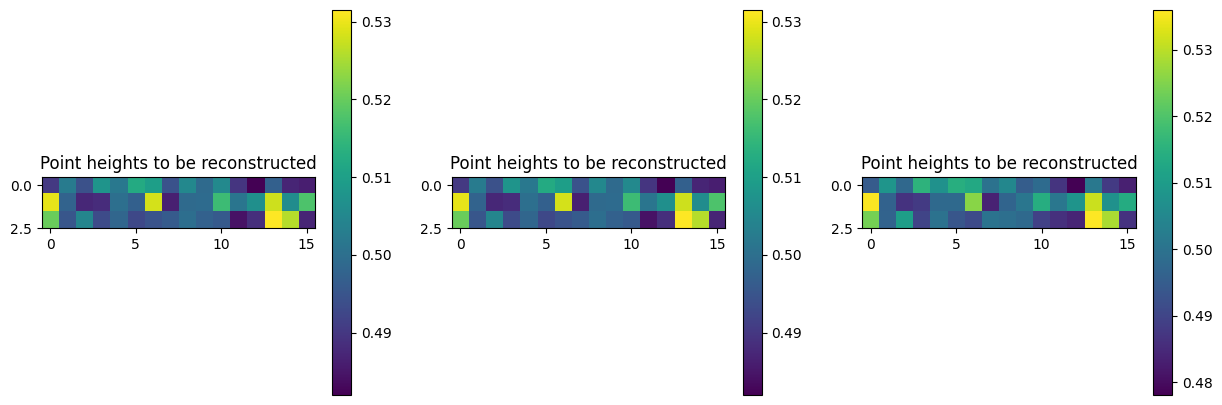

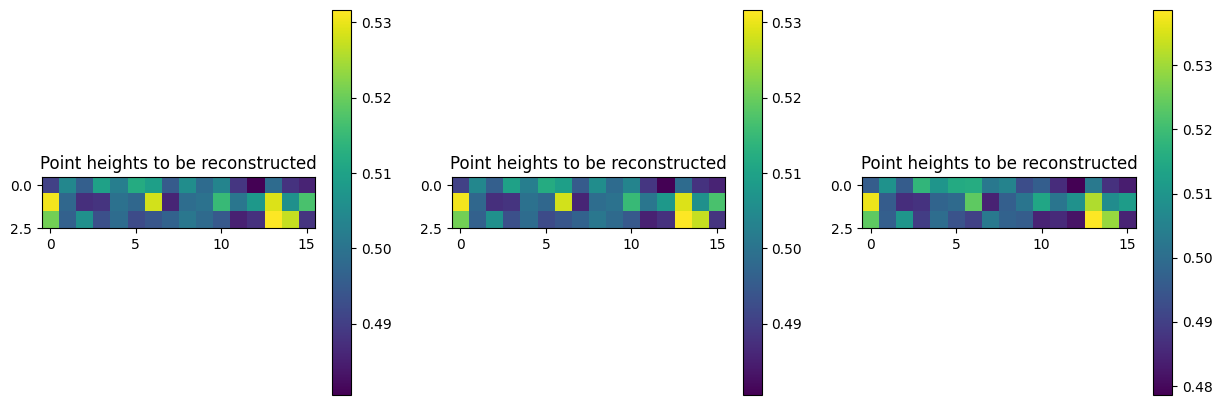

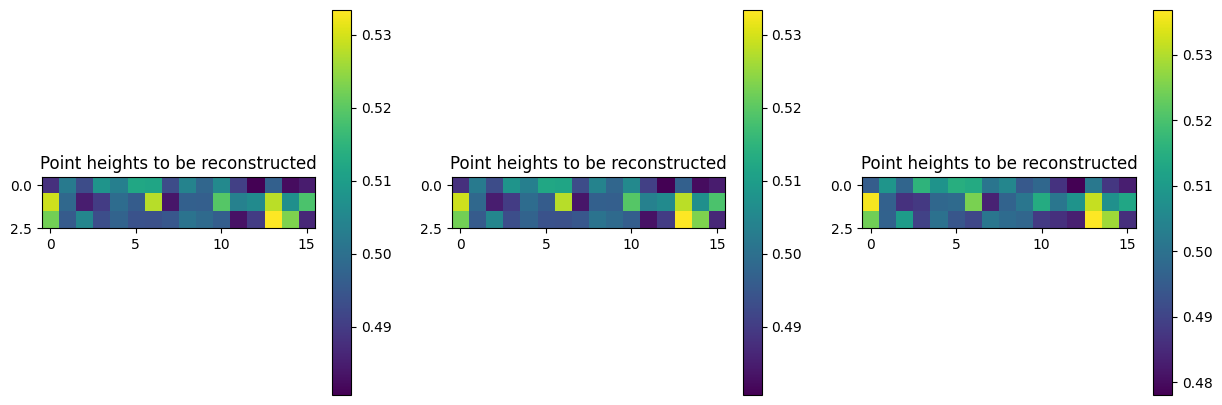

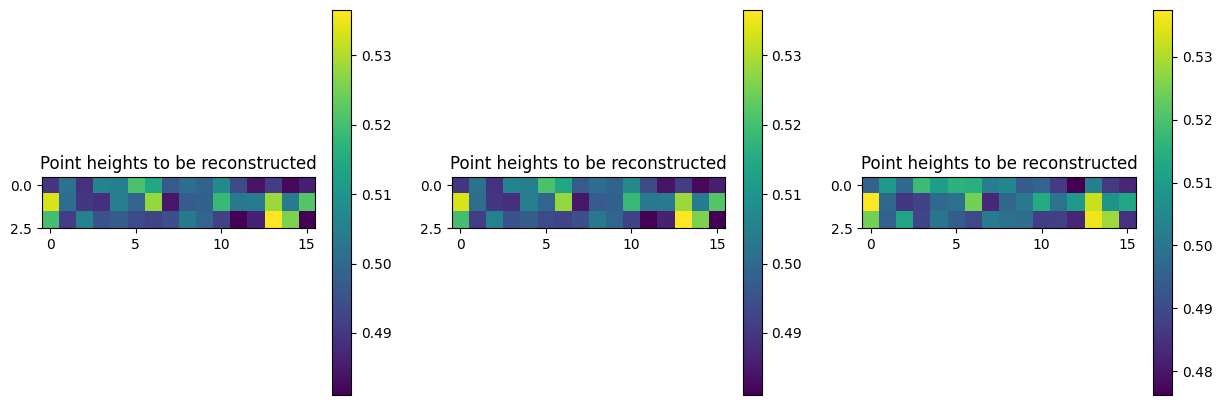

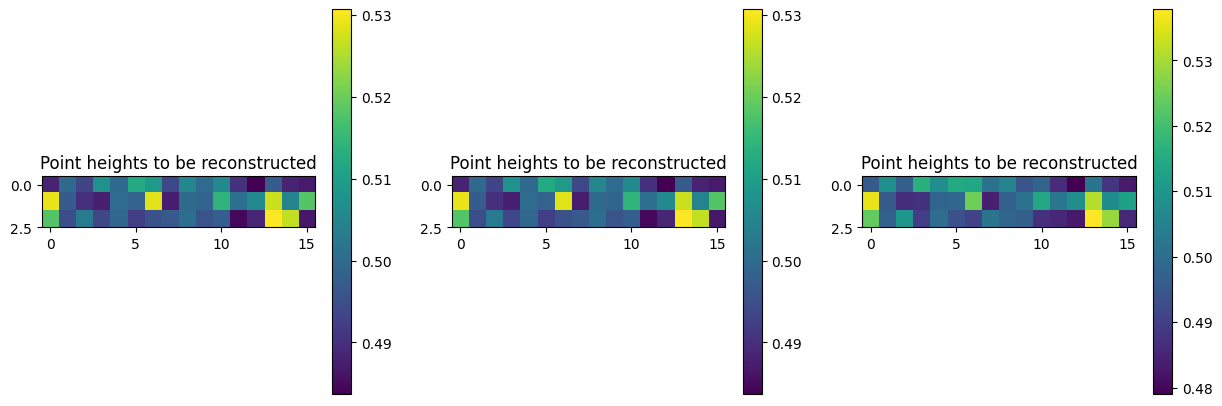

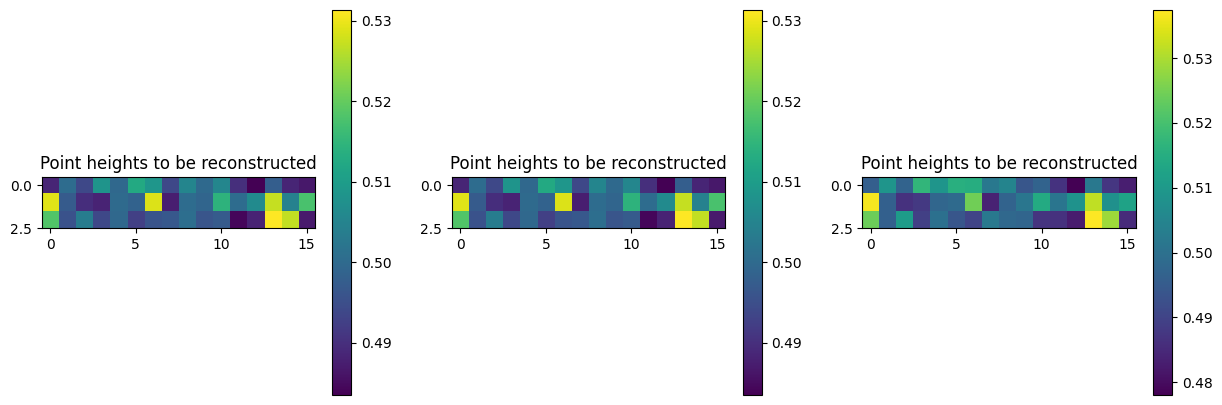

In [40]:
for i in range(10) :
  fig = plt.figure(figsize = (15 , 5 ) )
  ax1 = fig.add_subplot(1 , 3 , 1 )
  ax2 = fig.add_subplot(1 , 3 , 2 )
  ax3 = fig.add_subplot(1 , 3 , 3 )
  rotated_data = np.rot90(result_xhat_health[i])
  img = ax1.imshow(rotated_data ,  cmap='viridis')
  cbar = plt.colorbar(img,)
  ax1.set_title('Point heights to be reconstructed')


  rotated_data = np.rot90(result_xhat_alpha[i])
  img = ax2.imshow(rotated_data ,  cmap='viridis')
  cbar = plt.colorbar(img,)
  ax2.set_title('Point heights to be reconstructed')

  rotated_data = np.rot90(result_xhat_void[i])
  img = ax3.imshow(rotated_data ,  cmap='viridis')
  cbar = plt.colorbar(img,)
  ax3.set_title('Point heights to be reconstructed')

In [28]:
ere1_vals_void , result_xhat_void = ERE1(z_void)
ere2_vals_void = ERE2(z_void).numpy()

In [29]:
ere1_vals_void_alpha , result_xhat_void_alpha = ERE1(z_void_alpha)
ere2_vals_void_alpha = ERE2(z_void_alpha).numpy()

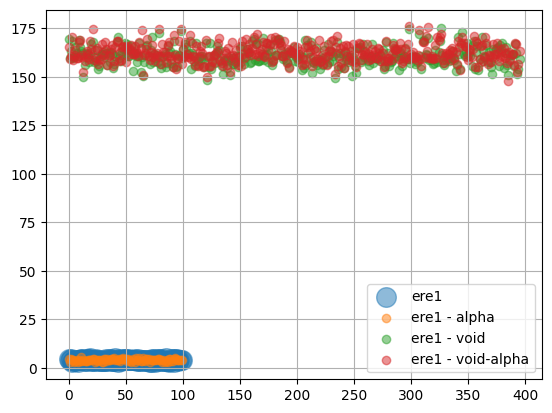

In [31]:
plt.scatter(range(len(ere1_vals)), ere1_vals , label = 'ere1' , s = 200 , alpha = 0.5  )
plt.scatter(range(len(ere1_vals_alpha)), ere1_vals_alpha , label = 'ere1 - alpha ' , alpha = 0.5 )
plt.scatter(range(len(ere1_vals_void)), ere1_vals_void , label = 'ere1 - void ' , alpha = 0.5 )
plt.scatter(range(len(ere1_vals_void_alpha)), ere1_vals_void_alpha , label = 'ere1 - void-alpha' , alpha = 0.5 )
plt.legend()
plt.grid()
plt.show()

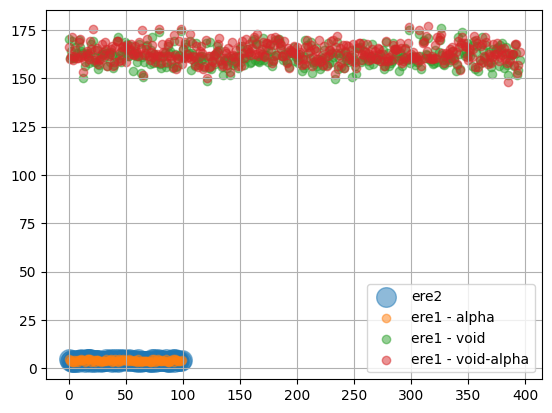

In [21]:
plt.scatter(range(len(ere2_vals)), ere2_vals , label = 'ere2' , s = 200 , alpha = 0.5  )
plt.scatter(range(len(ere2_vals_alpha)), ere2_vals_alpha , label = 'ere1 - alpha ' , alpha = 0.5 )
plt.scatter(range(len(ere2_vals_void)), ere2_vals_void , label = 'ere1 - void ' , alpha = 0.5 )
plt.scatter(range(len(ere2_vals_void_alpha)), ere2_vals_void_alpha , label = 'ere1 - void-alpha' , alpha = 0.5 )
plt.legend()
plt.grid()
plt.show()

In [85]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model

# داده های سالم
# X = np.array(z_health).reshape(-1, 16, 3, 1).astype("float32")
X = z_health
latent_dim = 4  # بعد فضای نهان

# -------------------
# Encoder
# -------------------
encoder_inputs = layers.Input(shape=(16, 3, 1))
x = layers.Conv2D(16, (3,3), padding="same", activation="relu")(encoder_inputs)
x = layers.Flatten()(x)
x = layers.Dense(32, activation="relu")(x)

z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# -------------------
# Decoder
# -------------------
latent_inputs = layers.Input(shape=(latent_dim,))
y = layers.Dense(16*3, activation="relu")(latent_inputs)
y = layers.Reshape((16, 3, 1))(y)
y = layers.Conv2DTranspose(16, (3,3), padding="same", activation="relu")(y)
decoder_outputs = layers.Conv2DTranspose(1, (3,3), padding="same", activation="sigmoid")(y)

decoder = Model(latent_inputs, decoder_outputs, name="decoder")

# -------------------
# VAE Model as subclass
# -------------------
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            # Reconstruction loss
            recon_loss = tf.reduce_mean(tf.reduce_sum(tf.square(data - reconstruction), axis=(1,2,3)))
            # KL loss
            kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))
            total_loss = recon_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {"loss": total_loss, "recon_loss": recon_loss, "kl_loss": kl_loss}

vae = VAE(encoder, decoder)
vae.compile(optimizer="adam")

# -------------------
# Train
# -------------------
vae.fit(X, epochs=30, batch_size=32, verbose=1)

# -------------------
# محاسبه ERE1
# -------------------
z_mean_pred, _, _ = encoder.predict(X)
X_recon = decoder.predict(z_mean_pred)

ERE1 = np.mean((X - X_recon)**2, axis=(1,2,3))
print("ERE1 for healthy data:", ERE1[:10])


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl_loss: 0.4095 - loss: 158.5678 - recon_loss: 158.1584
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - kl_loss: 0.0705 - loss: 156.0360 - recon_loss: 155.9655 
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - kl_loss: 0.0479 - loss: 153.3537 - recon_loss: 153.3058 
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - kl_loss: 0.1134 - loss: 149.1559 - recon_loss: 149.0425 
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - kl_loss: 0.9852 - loss: 141.8838 - recon_loss: 140.8987 
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - kl_loss: 3.2570 - loss: 133.7057 - recon_loss: 130.4487 
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - kl_loss: 2.5960 - loss: 128.5303 - recon_loss: 125.9343 
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - kl_loss: 2.3138 - loss: 123.8543 - recon_loss: 121.5405 
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - kl_loss: 2.0845 - loss: 121.7643 - recon_loss: 119.6798 
Epoch 10/30
13/13 ━━

In [88]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.model_selection import train_test_split

# -------------------
# داده‌های سالم و نرمال‌سازی
# -------------------
# X = np.array(z_health).reshape(-1, 16, 3, 1).astype("float32")
X = z_health
# اگر مقیاس روشن نیست، حداقل نرمال‌سازی به [0,1] یا استانداردسازی انجام بده:
X = (X - X.min()) / (X.max() - X.min() + 1e-8)

# Phase I/II split: فقط سالم
X_train, X_val = train_test_split(X, test_size=0.2, random_state=42, shuffle=True)

latent_dim = 4

# -------------------
# Encoder
# -------------------
encoder_inputs = layers.Input(shape=(16, 3, 1))
x = layers.Conv2D(16, (3,3), padding="same", activation="relu")(encoder_inputs)
x = layers.Conv2D(16, (3,3), padding="same", activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

def sampling(args):
    zm, zv = args
    eps = tf.random.normal(shape=tf.shape(zm))
    return zm + tf.exp(0.5 * zv) * eps

z = layers.Lambda(sampling, name="z")([z_mean, z_log_var])
encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# -------------------
# Decoder
# -------------------
latent_inputs = layers.Input(shape=(latent_dim,))
y = layers.Dense(16*3*16, activation="relu")(latent_inputs)
y = layers.Reshape((16, 3, 16))(y)
y = layers.Conv2DTranspose(16, (3,3), padding="same", activation="relu")(y)
decoder_outputs = layers.Conv2DTranspose(1, (3,3), padding="same", activation="sigmoid")(y)
decoder = Model(latent_inputs, decoder_outputs, name="decoder")

# -------------------
# VAE subclassed
# -------------------
class VAE(Model):
    def __init__(self, encoder, decoder, beta=1.0, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.beta = beta

    def train_step(self, data):
        if isinstance(data, tuple): data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data, training=True)
            recon = self.decoder(z, training=True)
            # MSE روی پیکسل‌ها
            recon_loss = tf.reduce_mean(tf.reduce_sum(tf.square(data - recon), axis=(1,2,3)))
            kl = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))
            total = recon_loss + self.beta * kl
        grads = tape.gradient(total, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {"loss": total, "recon_loss": recon_loss, "kl_loss": kl}

vae = VAE(encoder, decoder, beta=1.0)
vae.compile(optimizer=tf.keras.optimizers.Adam(1e-3))

# EarlyStopping برای جلوگیری از overfit
cb = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10, restore_best_weights=True)

vae.fit(X_train, epochs=200, batch_size=64, callbacks=[cb], verbose=1)

# -------------------
# ERE1 روی Phase I و Phase II
# -------------------
# ERE1(x) = || x - decoder(mean_z(x)) ||^2
def ere1_scores(X_in):
    z_m, _, _ = encoder.predict(X_in, verbose=0)
    X_hat = decoder.predict(z_m, verbose=0)
    return np.mean((X_in - X_hat)**2, axis=(1,2,3))  , X_hat

ere1_train , recosnted_train = ere1_scores(X_train)
ere1_val   , reconsted_val   = ere1_scores(X_val)

# حد کنترل (UCL) از صدک 99.5% روی Phase I
ucl = np.quantile(ere1_train, 0.995)

print(f"ERE1 train: mean={ere1_train.mean():.4f}, std={ere1_train.std():.4f}")
print(f"ERE1 val:   mean={ere1_val.mean():.4f}, std={ere1_val.std():.4f}")
print(f"UCL (99.5% on train) = {ucl:.4f}")

# نرخ آلارم کاذب روی Phase II (باید ~0.5% باشه اگر توزیع‌ها نزدیک باشن)
false_alarm = (ere1_val > ucl).mean()*100
print(f"False alarm on healthy validation: {false_alarm:.2f}")


Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - kl_loss: 0.0054 - loss: 6.4324 - recon_loss: 6.4270
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - kl_loss: 0.0016 - loss: 6.0101 - recon_loss: 6.0085
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - kl_loss: 0.0016 - loss: 5.6147 - recon_loss: 5.6131
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - kl_loss: 0.0121 - loss: 5.0258 - recon_loss: 5.0138
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - kl_loss: 0.0614 - loss: 4.3908 - recon_loss: 4.3294
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - kl_loss: 0.0788 - loss: 3.7005 - recon_loss: 3.6217
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - kl_loss: 0.0467 - loss: 3.0552 - recon_loss: 3.0085
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - kl_loss: 0.0331 - loss: 2.5689 - recon_loss: 2.5357
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - kl_loss: 0.0204 - loss: 2.1457 - recon_loss: 2.1253
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - kl_loss: 0.

In [90]:
# X_faulty = np.array(z_faulty).reshape(-1, 16, 3, 1).astype("float32")
X_faulty = z_alpha
X_faulty_alpha = (X_faulty - X_faulty.min()) / (X_faulty.max() - X_faulty.min() + 1e-8)

In [93]:
def ere1_scores(X_in):
    z_m, _, _ = encoder.predict(X_in, verbose=0)   # فقط mean
    X_hat = decoder.predict(z_m, verbose=0)        # بازسازی
    return np.mean((X_in - X_hat)**2, axis=(1,2,3)) , X_hat

ere1_faulty_alpha , recosnted_alpha = ere1_scores(X_faulty_alpha)
print("ERE1 for faulty data:", ere1_faulty_alpha[:10])


ERE1 for faulty data: [0.00047443 0.00063721 0.00049368 0.00041624 0.00048823 0.00042877
 0.00034333 0.0004517  0.0003778  0.00034619]


In [94]:
recosnted_alpha.shape

(396, 16, 3, 1)

In [96]:
ucl = np.quantile(ere1_train, 0.995)  # بر اساس سالم‌های آموزش‌دیده

# تشخیص معیوب‌ها
y_pred = (recosnted_alpha > ucl).astype(int)  # 1 = معیوب, 0 = سالم
detection_rate = y_pred.mean() * 100

print(f"Detection rate on faulty data: {detection_rate:.2f}%")


Detection rate on faulty data: 100.00%


In [97]:
# X_faulty = np.array(z_faulty).reshape(-1, 16, 3, 1).astype("float32")
X_faulty_void = z_void
X_faulty_void = (X_faulty_void - X_faulty_void.min()) / (X_faulty_void.max() - X_faulty_void.min() + 1e-8)

ere1_faulty_void  , recosnted_void = ere1_scores(X_faulty_void)
print("ERE1 for faulty data:", X_faulty_void[:10])

# تشخیص معیوب‌ها
y_pred = (ere1_faulty_void > ucl).astype(int)  # 1 = معیوب, 0 = سالم
detection_rate = y_pred.mean() * 100

print(f"Detection rate on faulty data: {detection_rate:.2f}%")


ERE1 for faulty data: [[[[0.00532521]
   [0.00637477]
   [0.00864481]]

  [[0.00598661]
   [0.005301  ]
   [0.00593418]]

  [[0.01356956]
   [0.0149388 ]
   [0.01948468]]

  [[0.02524102]
   [0.02652975]
   [0.02481351]]

  [[0.03088373]
   [0.02745281]
   [0.02896657]]

  [[0.06982736]
   [0.06016103]
   [0.04731093]]

  [[0.08517682]
   [0.07523774]
   [0.07969422]]

  [[0.11454917]
   [0.11830576]
   [0.11686866]]

  [[0.16628705]
   [0.18569899]
   [0.17071573]]

  [[0.27529319]
   [0.2460758 ]
   [0.25116651]]

  [[0.30847119]
   [0.32752778]
   [0.30561485]]

  [[0.39563425]
   [0.37447518]
   [0.36983688]]

  [[0.47205361]
   [0.50654647]
   [0.47890626]]

  [[0.57766245]
   [0.57913349]
   [0.60026981]]

  [[0.73581368]
   [0.70271086]
   [0.72852472]]

  [[0.94905631]
   [0.92101256]
   [0.90729379]]]


 [[[0.00709813]
   [0.00687528]
   [0.00744101]]

  [[0.00603799]
   [0.00479274]
   [0.00420716]]

  [[0.01718929]
   [0.01944941]
   [0.01758315]]

  [[0.02147815]
   [0.0267

In [98]:
# X_faulty = np.array(z_faulty).reshape(-1, 16, 3, 1).astype("float32")
X_faulty_void_alpha = z_void_alpha
X_faulty_void_alpha = (X_faulty_void_alpha - X_faulty_void_alpha.min()) / (X_faulty_void_alpha.max() - X_faulty_void_alpha.min() + 1e-8)

ere1_faulty_void  , recosnted_void_alpha = ere1_scores(X_faulty_void_alpha)
print("ERE1 for faulty data:", X_faulty_void_alpha[:10])

# تشخیص معیوب‌ها
y_pred = (X_faulty_void_alpha > ucl).astype(int)  # 1 = معیوب, 0 = سالم
detection_rate = y_pred.mean() * 100

print(f"Detection rate on faulty data: {detection_rate:.2f}%")


ERE1 for faulty data: [[[[0.00539284]
   [0.00645572]
   [0.00875458]]

  [[0.00606263]
   [0.00536831]
   [0.00600954]]

  [[0.01374187]
   [0.01512849]
   [0.0197321 ]]

  [[0.02556154]
   [0.02686664]
   [0.0251286 ]]

  [[0.03127591]
   [0.02780142]
   [0.0293344 ]]

  [[0.07071406]
   [0.06092499]
   [0.04791171]]

  [[0.08625843]
   [0.07619314]
   [0.08070621]]

  [[0.11600377]
   [0.11980806]
   [0.11835271]]

  [[0.16839864]
   [0.18805707]
   [0.17288355]]

  [[0.27878898]
   [0.24920057]
   [0.25435593]]

  [[0.3123883 ]
   [0.33168687]
   [0.30949568]]

  [[0.40065819]
   [0.37923043]
   [0.37453323]]

  [[0.47804795]
   [0.51297882]
   [0.48498762]]

  [[0.58499786]
   [0.58648758]
   [0.6078923 ]]

  [[0.74515736]
   [0.71163419]
   [0.73777584]]

  [[0.91736136]
   [0.8889615 ]
   [0.92774098]]]


 [[[0.00718827]
   [0.00696258]
   [0.00753549]]

  [[0.00611467]
   [0.0048536 ]
   [0.00426058]]

  [[0.01740757]
   [0.01969639]
   [0.01780643]]

  [[0.02175089]
   [0.0271

In [99]:
recosnted_void_alpha.shape

(396, 16, 3, 1)

In [101]:
# X_faulty = np.array(z_faulty).reshape(-1, 16, 3, 1).astype("float32")
X_faulty_health = z_health
X_faulty_health = (X_faulty_health - X_faulty_health.min()) / (X_faulty_health.max() - X_faulty_health.min() + 1e-8)

ere1_faulty_health  , recosnted_health = ere1_scores(X_faulty_health)
print("ERE1 for faulty data:", ere1_faulty_health[:10])

# تشخیص معیوب‌ها
y_pred = (ere1_faulty_health > ucl).astype(int)  # 1 = معیوب, 0 = سالم
detection_rate = y_pred.mean() * 100

print(f"Detection rate on faulty data: {detection_rate:.2f}%")

ERE1 for faulty data: [0.00044059 0.00053376 0.00035003 0.00054218 0.00043859 0.00037328
 0.00058725 0.00029001 0.00037824 0.00036387]
Detection rate on faulty data: 0.76%


In [ ]:
plt.hist(z_health[i] , bins=50 , label='original' , density=True )
plt.hist(recosnted_health[i] , bins=50 , label='recosted health'  , density=True )
plt.hist(z_alpha[i] , bins=50 , label='original alpha' , density=True )
plt.hist(recosnted_alpha[i] , bins=50 , label='reconst alpha' , density=True )


ValueError: x must have 2 or fewer dimensions

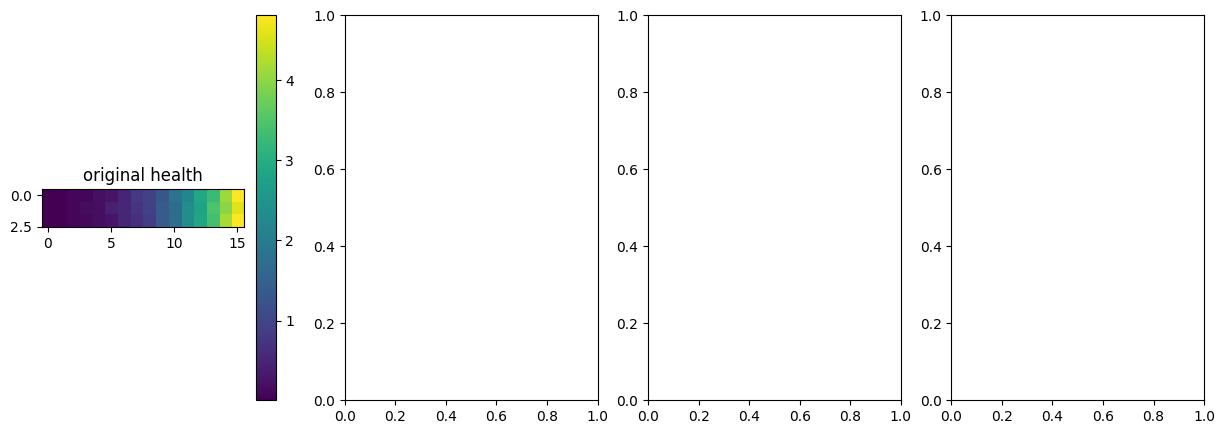

In [107]:
for i in range(10) :
  fig = plt.figure(figsize = (15 , 5 ) )
  ax1 = fig.add_subplot(1 , 4 , 1 )
  ax2 = fig.add_subplot(1 , 4 , 2 )
  ax3 = fig.add_subplot(1 , 4 , 3 )
  ax4 = fig.add_subplot(1 , 4 , 4 )


  rotated_data = np.rot90(z_health[i])
  img = ax1.imshow(rotated_data ,  cmap='viridis')
  cbar = plt.colorbar(img,)
  ax1.set_title('original health')

  # plt.hist(z_health[i] , bins=50 , label='original' , density=True )


  rotated_data = np.rot90(recosnted_health[i])
  img = ax2.imshow(rotated_data ,  cmap='viridis')
  cbar = plt.colorbar(img,)
  ax2.set_title('recosted health')

  # plt.hist(recosnted_health[i] , bins=50 , label='recosted health'  , density=True )


  rotated_data = np.rot90(z_alpha[i])
  img = ax3.imshow(rotated_data ,  cmap='viridis')
  cbar = plt.colorbar(img,)
  ax3.set_title('original alpha')

  # plt.hist(z_alpha[i] , bins=50 , label='original alpha' , density=True )

  rotated_data = np.rot90(recosnted_alpha[i])
  img = ax4.imshow(rotated_data ,  cmap='viridis')
  cbar = plt.colorbar(img,)
  ax4.set_title('reconsted alpha')

  # plt.hist(recosnted_alpha[i] , bins=50 , label='reconst alpha' , density=True )




In [110]:
z_health[0].shape

(16, 3, 1)

/tmp/ipython-input-1946605018.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=z_health[i].reshape(-1 , 48))


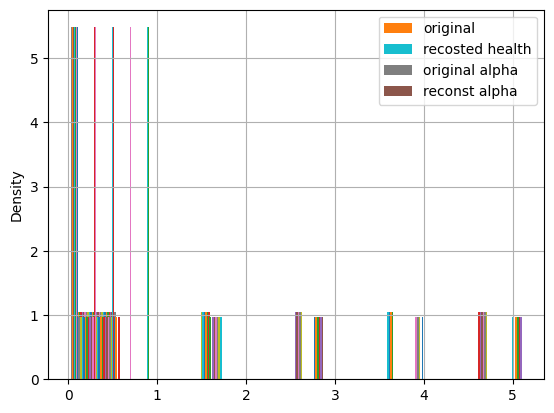

/tmp/ipython-input-1946605018.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=z_health[i].reshape(-1 , 48))


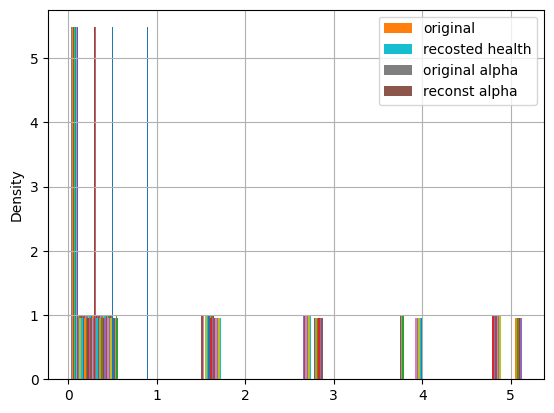

/tmp/ipython-input-1946605018.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=z_health[i].reshape(-1 , 48))


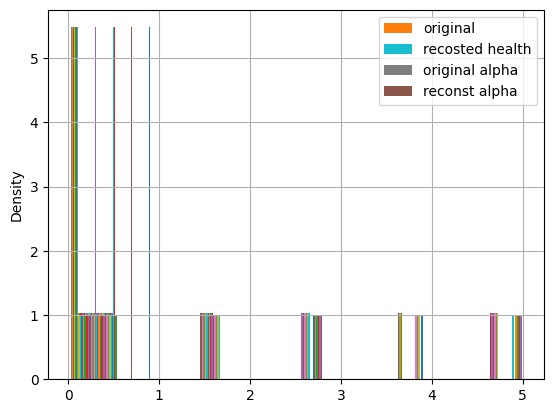

/tmp/ipython-input-1946605018.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=z_health[i].reshape(-1 , 48))


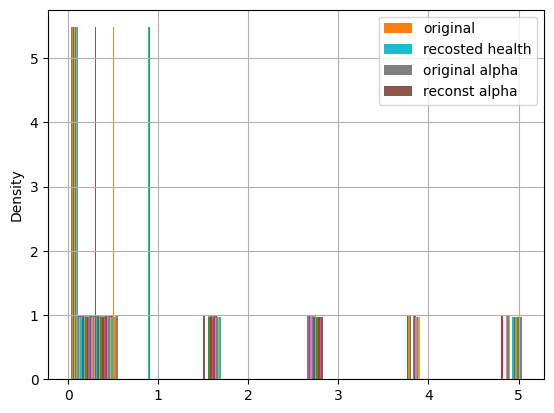

/tmp/ipython-input-1946605018.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=z_health[i].reshape(-1 , 48))


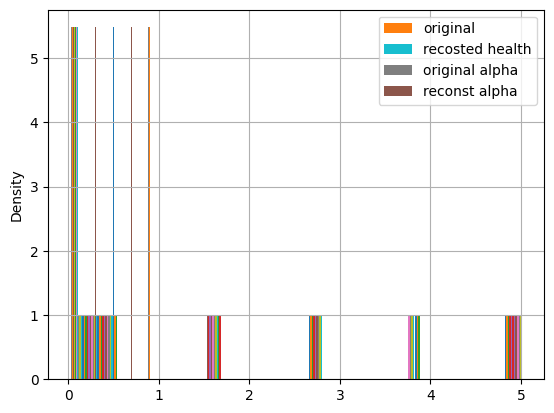

/tmp/ipython-input-1946605018.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=z_health[i].reshape(-1 , 48))


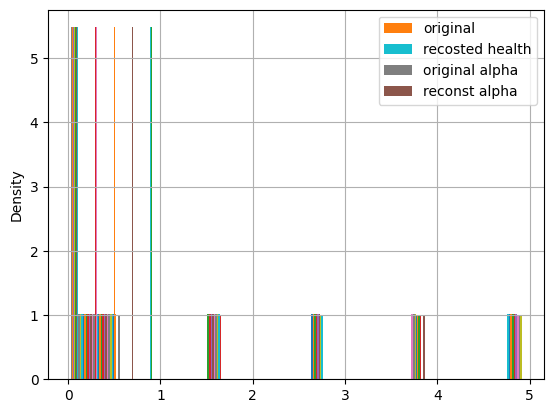

/tmp/ipython-input-1946605018.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=z_health[i].reshape(-1 , 48))


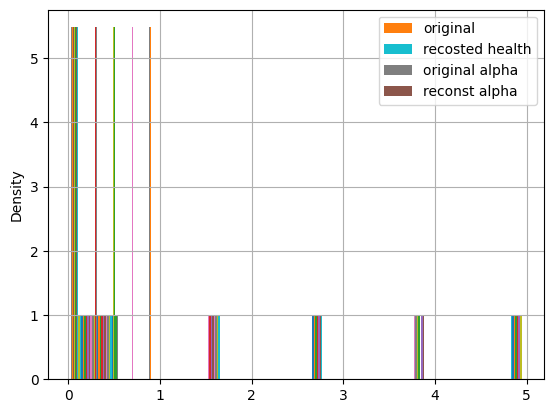

/tmp/ipython-input-1946605018.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=z_health[i].reshape(-1 , 48))


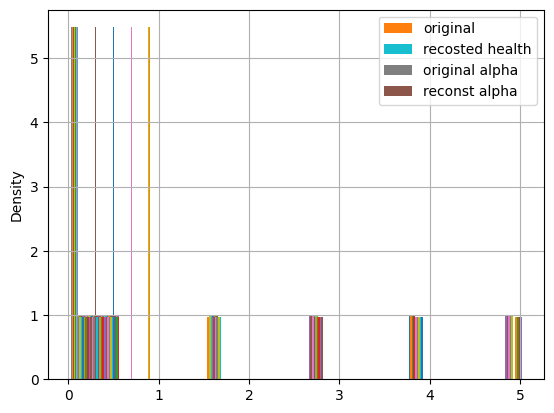

/tmp/ipython-input-1946605018.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=z_health[i].reshape(-1 , 48))


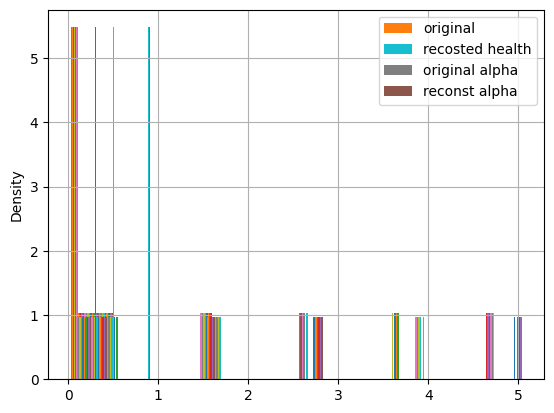

/tmp/ipython-input-1946605018.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=z_health[i].reshape(-1 , 48))


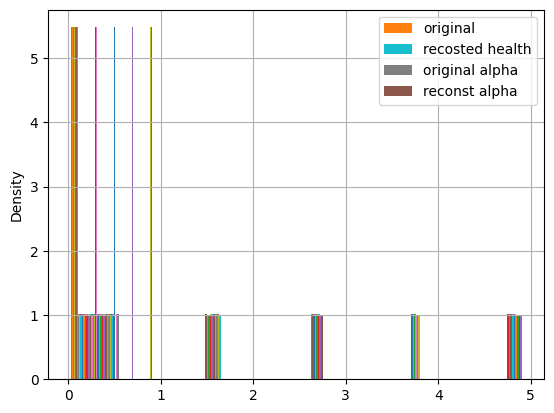

In [117]:
import seaborn as sns
for i in range(10) :
  sns.kdeplot(data=z_health[i].reshape(-1 , 48))
  plt.hist(z_health[i].reshape(-1 , 48 ) , bins=5 , label='original' , density=True )
  plt.hist(recosnted_health[i].reshape(-1 , 48 ) , bins=5 , label='recosted health'  , density=True )
  plt.hist(z_alpha[i].reshape(-1 , 48 ) , bins=5 , label='original alpha' , density=True )
  plt.hist(recosnted_alpha[i].reshape(-1 , 48 ) , bins=5 , label='reconst alpha' , density=True )
  plt.legend()
  plt.grid()
  plt.show()

